# Axelrod Examples: Playing Matches and Plotting Results

In [1]:
# Python 3
%matplotlib inline

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import axelrod as axl

plt.rcParams['figure.figsize'] = (10, 10)

# Matches

Let's try out some some simulated matches between two opponents and plot the score distributions. To make this interesting we should choose stochastic strategies. First we generate some matches between the players, score the results, and plot them per turn.

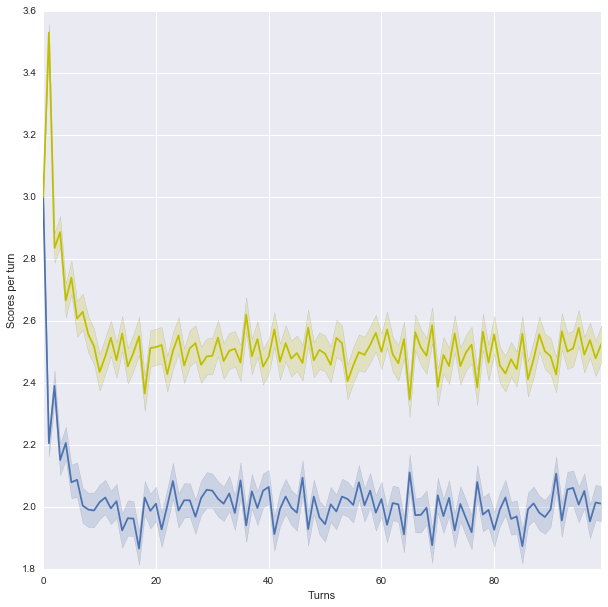

In [2]:
# Two Zero-Determinant Strategies
player1 = axl.ZDGTFT2()
player2 = axl.ZDSet2()

matches = 1000
turns = 100

scores = []
for i in range(matches):
    match = axl.Match((player1, player2), turns)
    results = match.play()
    scores.append(list(zip(*match.scores())))

scores1, scores2 = zip(*scores)

sns.tsplot(scores1)
sns.tsplot(scores2, color="y")
sns.plt.xlabel("Turns")
sns.plt.ylabel("Mean Scores per turn")

Now let's look at the end results for each strategy. We'll take the average score for each player over many matches and plot the resulting distributions

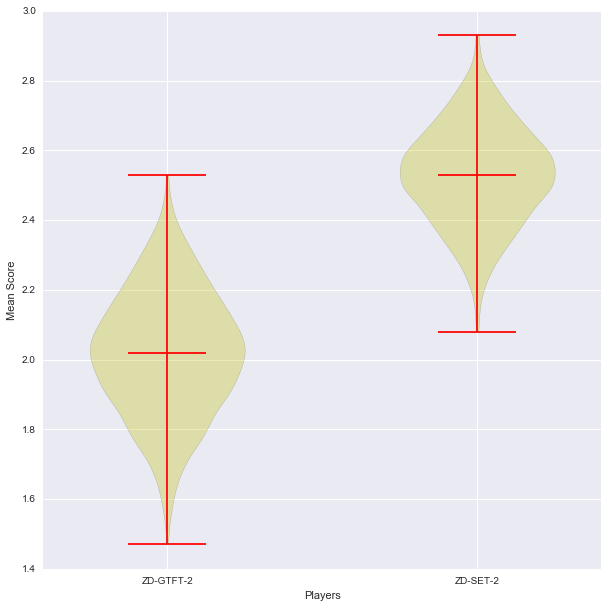

In [7]:
# Two Zero-Determinant Strategies
player1 = axl.ZDGTFT2()
player2 = axl.ZDSet2()

scores = []

for i in range(matches):
    match = axl.Match((player1, player2), turns)
    results = match.play()
    # Sum the scores from the match for each player
    scores.append(np.sum(match.scores(), axis=0) / float(turns))    

df = pd.DataFrame(scores)
df.columns = ["Player1", "Player2"]
df.mean()

plt.violinplot(df[["Player1", "Player2"]].as_matrix(), showmedians=True)
plt.xticks([1,2], [str(player1), str(player2)])
plt.ylabel("Mean Scores over all matches")
plt.xlabel("Players")

# Noisy Matches
Let's see how a little stochastic noise affects these plots. Without noise these next two strategies would always cooperate, and so both always score 3 points in each round. Instead they are driven toward mutual defection.

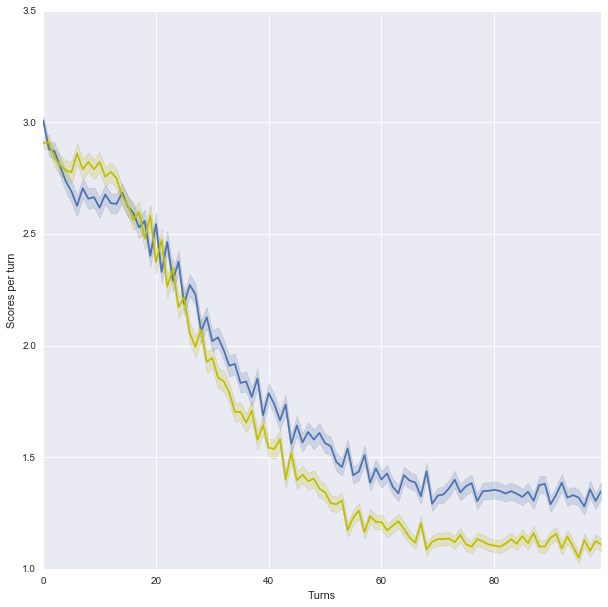

In [4]:
# Two typically deterministic strategies
player1 = axl.OmegaTFT()
player2 = axl.TitForTat()

scores = []
for i in range(matches):
    match = axl.Match((player1, player2), turns, noise=0.05) # 5% noise
    results = match.play()
    scores.append(list(zip(*match.scores())))

scores1, scores2 = zip(*scores)

sns.tsplot(scores1)
sns.tsplot(scores2, color="y")
sns.plt.xlabel("Turns")
sns.plt.ylabel("Mean Scores per turn")

Here we see that WinStayLoseShift is able to recover from the occasional defection due to noise to maintain mutual cooperation.

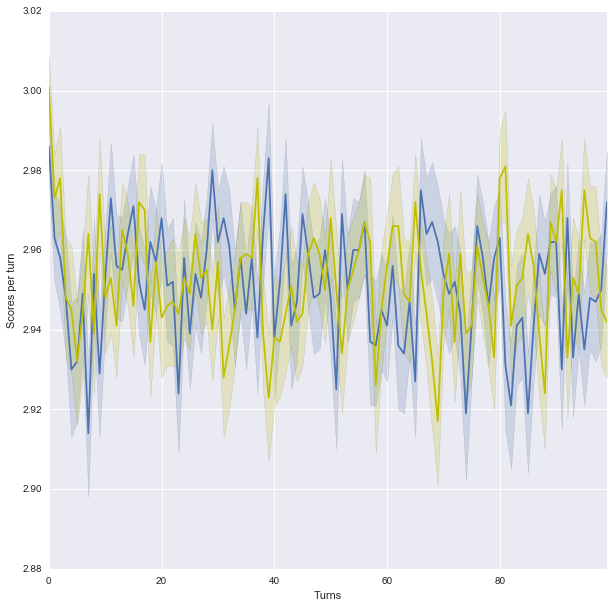

In [5]:
# Two typically deterministic strategies
player1 = axl.WinStayLoseShift()
player2 = axl.WinStayLoseShift()

scores = []
for i in range(matches):
    match = axl.Match((player1, player2), turns, noise=0.01) # 5% noise
    results = match.play()
    scores.append(list(zip(*match.scores())))

scores1, scores2 = zip(*scores)

sns.tsplot(scores1)
sns.tsplot(scores2, color="y")
sns.plt.xlabel("Turns")
sns.plt.ylabel("Mean Scores per turn")